<a href="https://colab.research.google.com/github/KaviyaKathiroli/MyWorks/blob/main/FlipHomePrice/housing_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tkinter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
from collections import Counter
import pandas_profiling as ProfileReporting

In [2]:
pwd

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir("drive/My Drive/CollabProject")

In [ ]:
pwd

'/content/drive/MyDrive/CollabProject'

Reading data from input file

In [11]:
price=pd.read_csv('/content/drive/My Drive/CollabProject/train.csv')

In [12]:
price.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


EDA

Hadling missing values

In [14]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [15]:
price.shape

(1168, 81)

In [16]:
for i in price.columns:
    print(price[i].value_counts())
    print("*"*40)

127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64
****************************************
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
****************************************
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
****************************

In [17]:
price['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64

In [18]:
len(price[price['LotFrontage'] == '']) 

0

In [19]:
price['LotFrontage'].isnull().sum()

214

In [20]:
for i in price.columns:
    ##if(data[i].unique()=='nan'):
    print(i,": ",price[i].isnull().sum())

Id :  0
MSSubClass :  0
MSZoning :  0
LotFrontage :  214
LotArea :  0
Street :  0
Alley :  1091
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrType :  7
MasVnrArea :  7
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  30
BsmtCond :  30
BsmtExposure :  31
BsmtFinType1 :  30
BsmtFinSF1 :  0
BsmtFinType2 :  31
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  0
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
FireplaceQu :  551
GarageType :  64
GarageYrBlt :  64
GarageFinish :  64
GarageCars :  0
GarageArea :

In [21]:
price["FireplaceQu"].fillna("No Fireplace", inplace = True)

In [22]:
price["FireplaceQu"]

0                 TA
1                 TA
2                 TA
3                 TA
4                 TA
            ...     
1163    No Fireplace
1164    No Fireplace
1165              TA
1166    No Fireplace
1167              Gd
Name: FireplaceQu, Length: 1168, dtype: object

In [23]:
price["Alley"].fillna("No alley", inplace = True)

In [24]:
price["Alley"]

0       No alley
1       No alley
2       No alley
3       No alley
4       No alley
          ...   
1163    No alley
1164    No alley
1165    No alley
1166        Pave
1167    No alley
Name: Alley, Length: 1168, dtype: object

In [26]:
price["PoolQC"].fillna("No Pool", inplace = True)

In [27]:
price["PoolQC"]

0       No Pool
1       No Pool
2       No Pool
3       No Pool
4       No Pool
         ...   
1163    No Pool
1164    No Pool
1165    No Pool
1166    No Pool
1167    No Pool
Name: PoolQC, Length: 1168, dtype: object

In [28]:
price["Fence"].fillna("No Fence", inplace = True)

In [29]:
price["Fence"]

0       No Fence
1       No Fence
2       No Fence
3          MnPrv
4       No Fence
          ...   
1163       MnPrv
1164       MnPrv
1165    No Fence
1166       MnPrv
1167    No Fence
Name: Fence, Length: 1168, dtype: object

In [31]:
price["MiscFeature"].fillna("No Misc", inplace = True)

In [32]:
price["MiscFeature"]

0       No Misc
1       No Misc
2       No Misc
3       No Misc
4       No Misc
         ...   
1163    No Misc
1164    No Misc
1165    No Misc
1166    No Misc
1167    No Misc
Name: MiscFeature, Length: 1168, dtype: object

In [33]:
price["LotFrontage"].isnull().sum()

214

In [34]:
price["LotFrontage"].mean()

70.98846960167715

In [35]:
price["LotFrontage"].fillna(price["LotFrontage"].mean(), inplace = True)

In [36]:
price["LotFrontage"].isnull().sum()

0

In [37]:
price["GarageType"].fillna("No Garage", inplace = True)
price["GarageYrBlt"].fillna("No Garage", inplace = True)
price["GarageFinish"].fillna("No Garage", inplace = True)
price["GarageQual"].fillna("No Garage", inplace = True)
price["GarageCond"].fillna("No Garage", inplace = True)

In [38]:
for i in price.columns:
    ##if(data[i].unique()=='nan'):
    print(i,": ",price[i].isnull().sum())

Id :  0
MSSubClass :  0
MSZoning :  0
LotFrontage :  0
LotArea :  0
Street :  0
Alley :  0
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrType :  7
MasVnrArea :  7
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  30
BsmtCond :  30
BsmtExposure :  31
BsmtFinType1 :  30
BsmtFinSF1 :  0
BsmtFinType2 :  31
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  0
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
FireplaceQu :  0
GarageType :  0
GarageYrBlt :  0
GarageFinish :  0
GarageCars :  0
GarageArea :  0
Garage

In [39]:
MasVnrType :  7
MasVnrArea :  7
BsmtQual :  30
BsmtCond :  30
BsmtExposure :  31
BsmtFinType1 :  30
BsmtFinType2 :  31

In [40]:
price["MasVnrType"].mode()

0    None
dtype: object

In [41]:
price["BsmtQual"].mode()

0    TA
dtype: object

In [42]:
price["BsmtCond"].mode()

0    TA
dtype: object

In [43]:
price["BsmtExposure"].mode()

0    No
dtype: object

In [44]:
price["BsmtFinType2"].mode()

0    Unf
dtype: object

In [ ]:
#data['BsmtFinType1'].mean()

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [46]:
#data["MasVnrType"].fillna(data["MasVnrType"].mode(), inplace = True)
price["MasVnrArea"].fillna(0, inplace = True)
#data["BsmtQual"].fillna(data["BsmtQual"].mode(), inplace = True)
#data["BsmtCond"].fillna(data["BsmtCond"].mode(), inplace = True)
#data["BsmtExposure"].fillna(data["BsmtExposure"].mode(), inplace = True)
#data["BsmtFinType1"].fillna(data["BsmtFinType1"].mode(), inplace = True)
price["BsmtFinType2"].fillna(price["BsmtFinType2"].mode(), inplace = True)

In [47]:
price["BsmtFinType1"].fillna(price["BsmtFinType1"].mode()[0], inplace = True)
price["BsmtExposure"].fillna(price["BsmtExposure"].mode()[0], inplace = True)

In [48]:
price["MasVnrType"].fillna(price["MasVnrType"].mode()[0], inplace = True)

In [49]:
price["BsmtQual"].fillna(price["BsmtQual"].mode()[0], inplace = True)
price["BsmtCond"].fillna(price["BsmtCond"].mode()[0], inplace = True)

In [50]:
for i in price.columns:
    ##if(data[i].unique()=='nan'):
    print(i,": ",price[i].isnull().sum())

Id :  0
MSSubClass :  0
MSZoning :  0
LotFrontage :  0
LotArea :  0
Street :  0
Alley :  0
LotShape :  0
LandContour :  0
Utilities :  0
LotConfig :  0
LandSlope :  0
Neighborhood :  0
Condition1 :  0
Condition2 :  0
BldgType :  0
HouseStyle :  0
OverallQual :  0
OverallCond :  0
YearBuilt :  0
YearRemodAdd :  0
RoofStyle :  0
RoofMatl :  0
Exterior1st :  0
Exterior2nd :  0
MasVnrType :  0
MasVnrArea :  0
ExterQual :  0
ExterCond :  0
Foundation :  0
BsmtQual :  0
BsmtCond :  0
BsmtExposure :  0
BsmtFinType1 :  0
BsmtFinSF1 :  0
BsmtFinType2 :  31
BsmtFinSF2 :  0
BsmtUnfSF :  0
TotalBsmtSF :  0
Heating :  0
HeatingQC :  0
CentralAir :  0
Electrical :  0
1stFlrSF :  0
2ndFlrSF :  0
LowQualFinSF :  0
GrLivArea :  0
BsmtFullBath :  0
BsmtHalfBath :  0
FullBath :  0
HalfBath :  0
BedroomAbvGr :  0
KitchenAbvGr :  0
KitchenQual :  0
TotRmsAbvGrd :  0
Functional :  0
Fireplaces :  0
FireplaceQu :  0
GarageType :  0
GarageYrBlt :  0
GarageFinish :  0
GarageCars :  0
GarageArea :  0
GarageQual

In [51]:
pd.set_option('display.max_columns',None)

In [52]:
price.shape

(1168, 81)

In [53]:
price.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

To describe statistic details on numerical data

In [54]:
price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Dropping non related columns

In [55]:
price.drop(['Id'],axis=1,inplace=True)
price.drop(['MSSubClass'],axis=1,inplace=True)
price.drop(['MSZoning'],axis=1,inplace=True)
price.drop(['LotFrontage'],axis=1,inplace=True)
price.drop(['Alley'],axis=1,inplace=True)
price.drop(['GarageCars'],axis=1,inplace=True)
price.drop(['MiscFeature'],axis=1,inplace=True)
price.drop(['MiscVal'],axis=1,inplace=True)

Seggregating features

In [56]:
numerical_feature=[feature for feature in price.columns if price[feature].dtypes!='O']
descrete_feature=[feature for feature in numerical_feature if len(price[feature].unique())<25]
cont_feature=[feature for feature in numerical_feature if feature not in descrete_feature]
category_feature=[feature for feature in price.columns if feature not in numerical_feature]

In [57]:
category_feature

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [ ]:
cont_feature

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

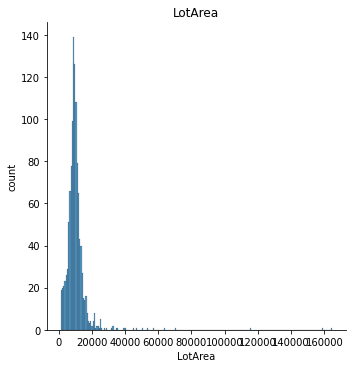

<Figure size 1080x1080 with 0 Axes>

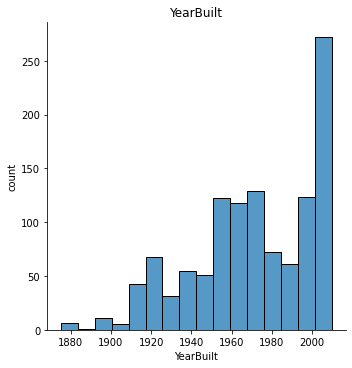

<Figure size 1080x1080 with 0 Axes>

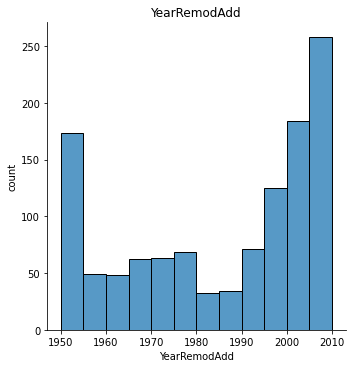

<Figure size 1080x1080 with 0 Axes>

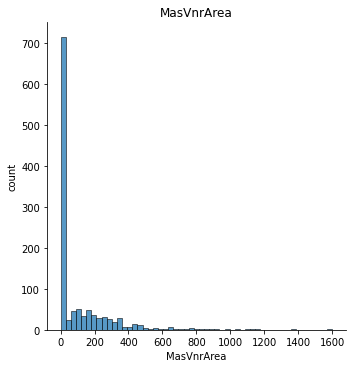

<Figure size 1080x1080 with 0 Axes>

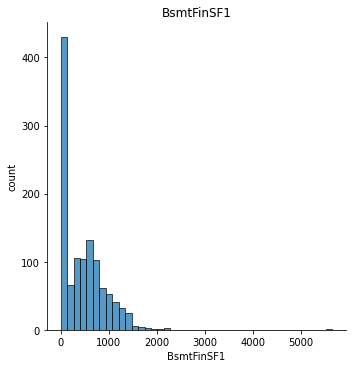

<Figure size 1080x1080 with 0 Axes>

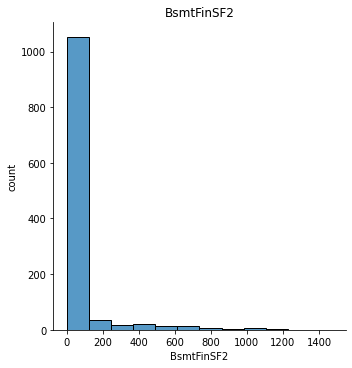

<Figure size 1080x1080 with 0 Axes>

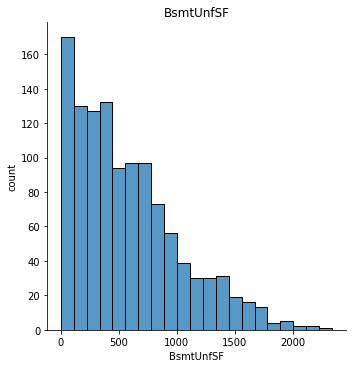

<Figure size 1080x1080 with 0 Axes>

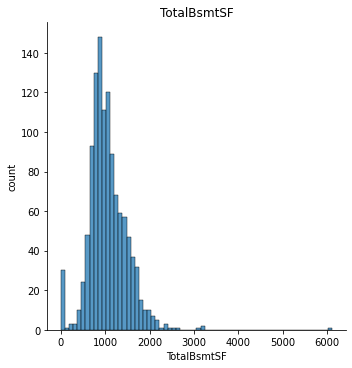

<Figure size 1080x1080 with 0 Axes>

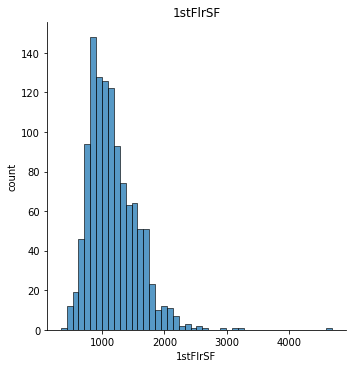

<Figure size 1080x1080 with 0 Axes>

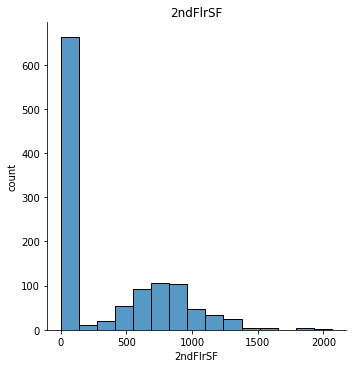

<Figure size 1080x1080 with 0 Axes>

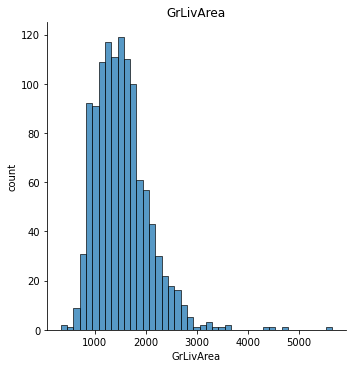

<Figure size 1080x1080 with 0 Axes>

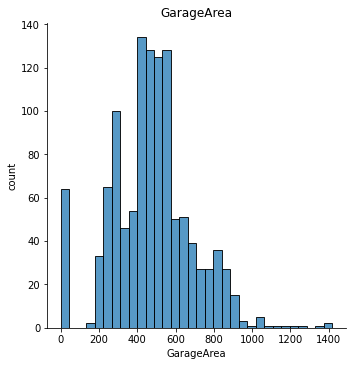

<Figure size 1080x1080 with 0 Axes>

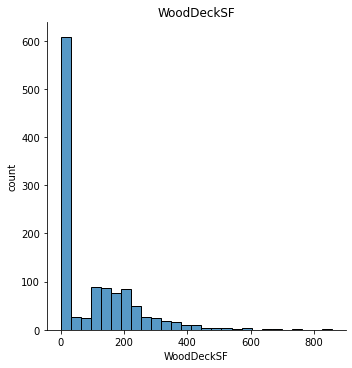

<Figure size 1080x1080 with 0 Axes>

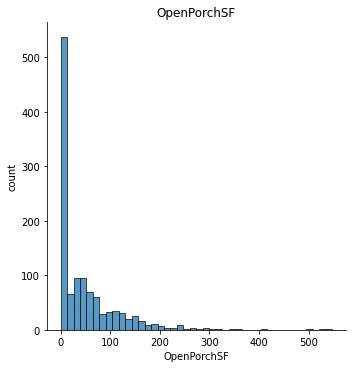

<Figure size 1080x1080 with 0 Axes>

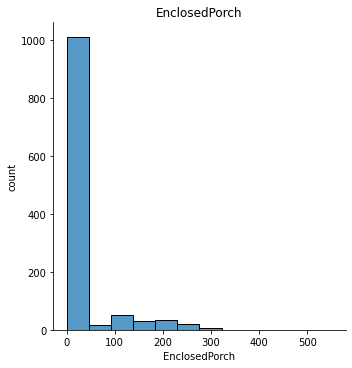

<Figure size 1080x1080 with 0 Axes>

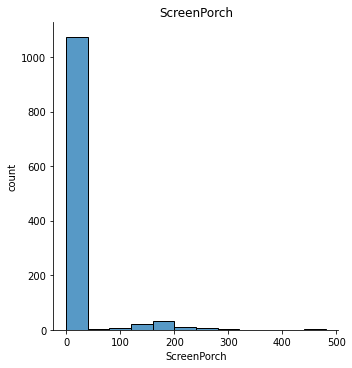

<Figure size 1080x1080 with 0 Axes>

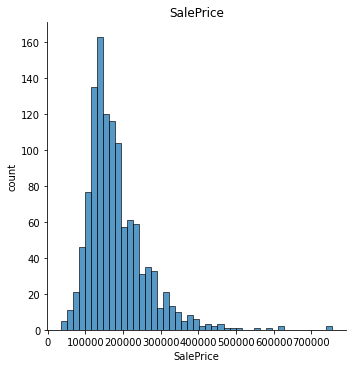

<Figure size 1080x1080 with 0 Axes>

In [58]:
for feature in cont_feature:
    data=price.copy()
    sns.displot(price[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [59]:
data

,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,440,TA,TA,Y,0,205,0,0,0,0,No Pool,No Fence,2,2007,WD,Normal,128000
1,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,621,TA,TA,Y,81,207,0,0,224,0,No Pool,No Fence,10,2007,WD,Normal,268000
2,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,455,TA,TA,Y,180,130,0,0,0,0,No Pool,No Fence,6,2007,WD,Normal,269790
3,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,546,TA,TA,Y,0,122,0,0,0,0,No Pool,MnPrv,1,2010,COD,Normal,190000
4,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,529,TA,TA,Y,240,0,0,0,0,0,No Pool,No Fence,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,No Fireplace,Detchd,1970.0,Unf,280,TA,TA,Y,0,0,0,0,0,0,No Pool,MnPrv,2,2010,WD,Normal,122000
1164,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Detchd,2002.0,Fin,520,TA,TA,N,0,96,0,0,0,0,No Pool,MnPrv,5,2009,WD,Normal,108000
1165,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,440,TA,TA,Y,87,0,0,0,0,0,No Pool,No Fence,7,2009,WD,Normal,148500
1166,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,No Fireplace,Detchd,1920.0,Unf,250,TA,Fa,N,0,54,172,0,0,0,No Pool,MnPrv,7,2008,WD,Normal,40000


Handling Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


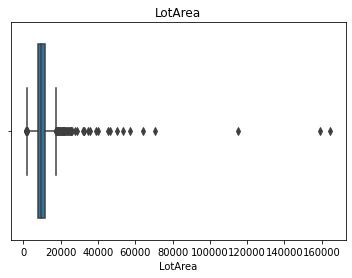

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


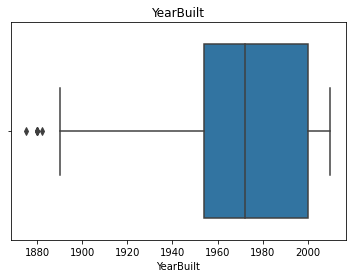

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


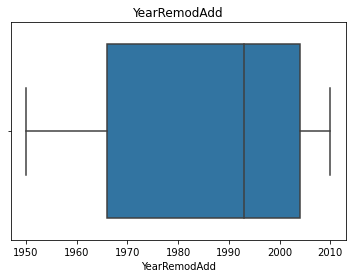

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


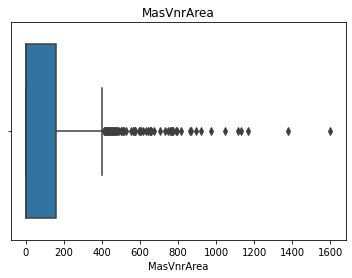

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


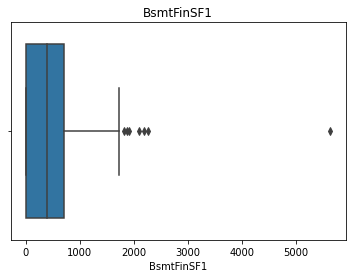

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


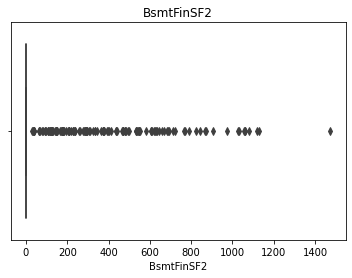

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


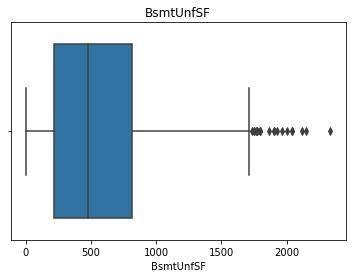

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


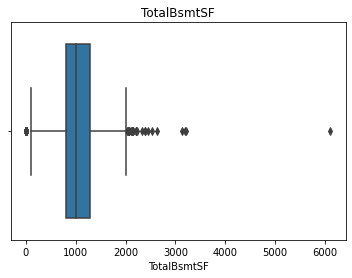

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


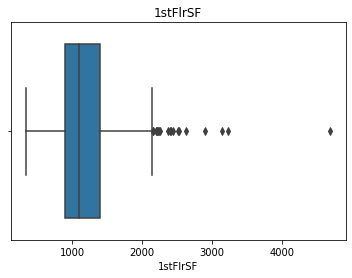

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


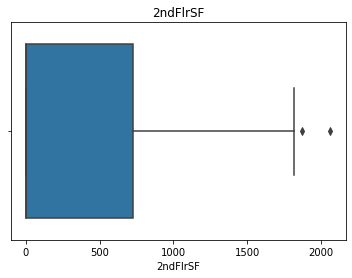

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


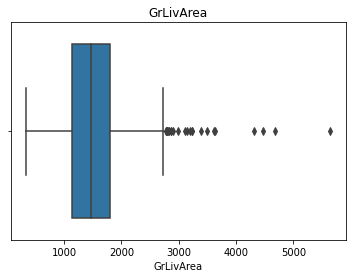

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


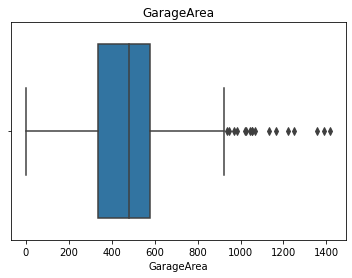

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


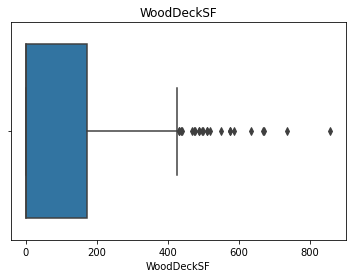

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


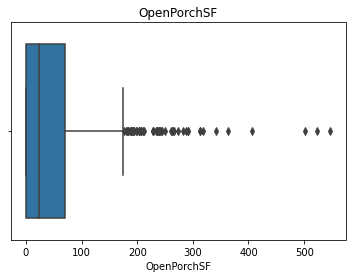

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


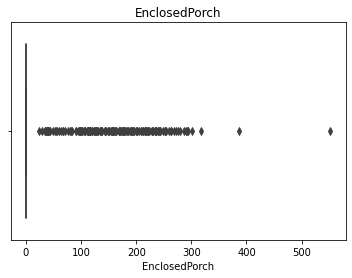

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


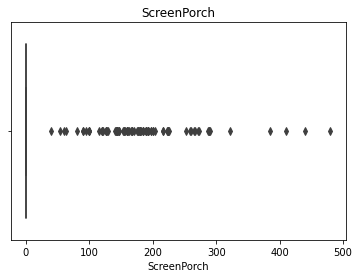

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


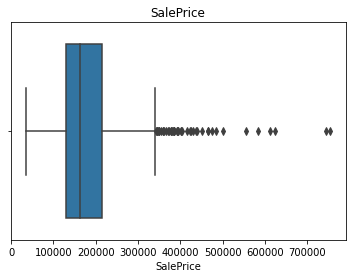

<Figure size 1080x1080 with 0 Axes>

In [60]:
for feature in cont_feature:
    data=price.copy()
    sns.boxplot(price[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [62]:
def outliers(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lowbridge=df[variable].quantile(0.25)-(IQR*1.5)
    highbridge=df[variable].quantile(0.75)+(IQR*1.5)
    
    df.loc[df[variable]>=highbridge,variable]=highbridge
    df.loc[df[variable]<=lowbridge,variable]=lowbridge

In [63]:
for feature in cont_feature:
    outliers(price,str(feature))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


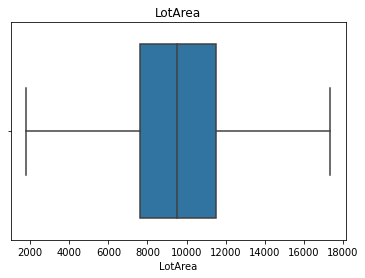

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


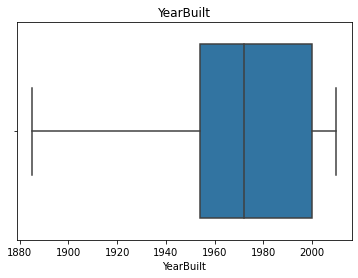

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


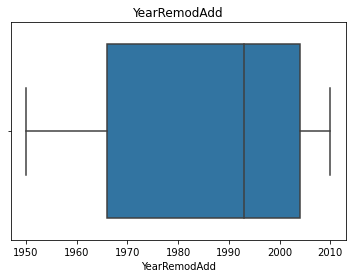

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


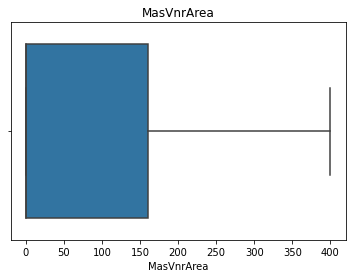

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


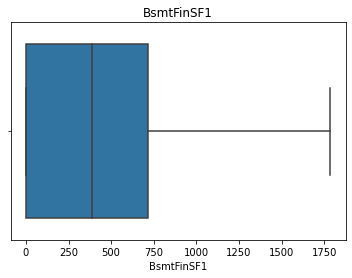

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


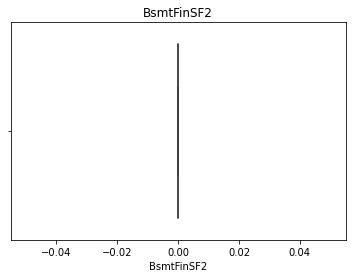

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


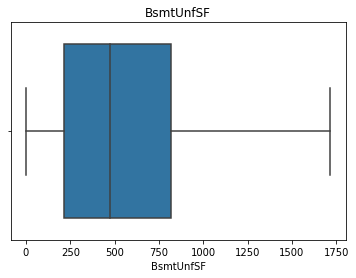

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


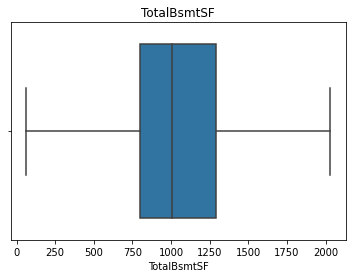

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


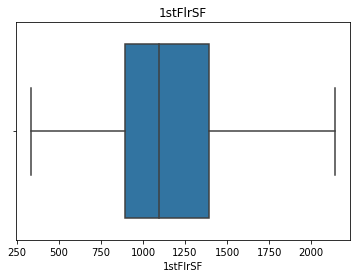

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


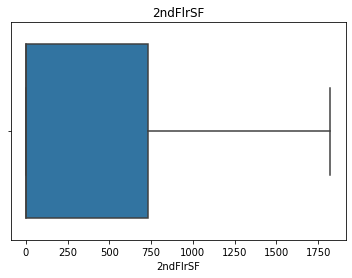

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


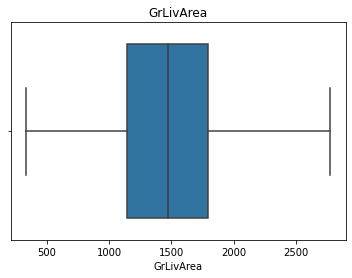

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


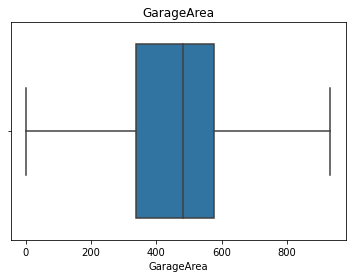

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


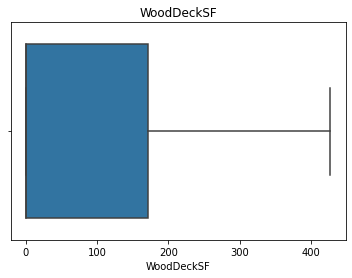

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


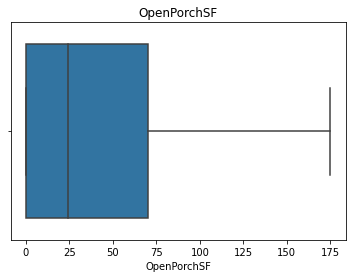

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


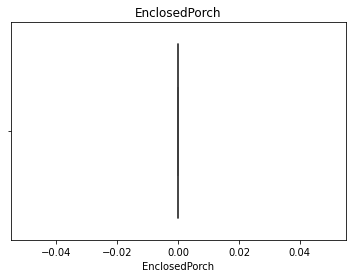

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


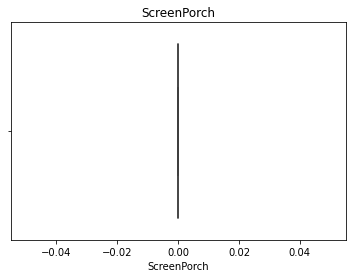

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


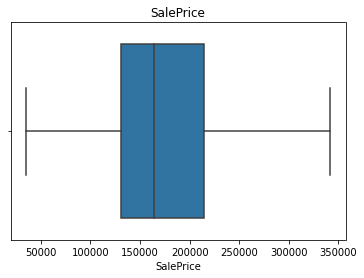

<Figure size 1080x1080 with 0 Axes>

In [64]:
for feature in cont_feature:
    data=price.copy()
    sns.boxplot(price[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

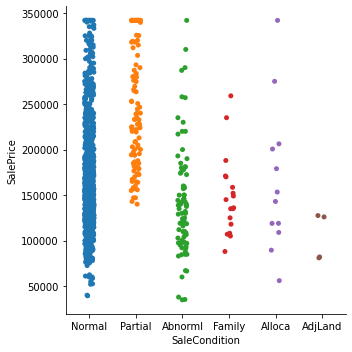

In [73]:
sns.catplot(x="SaleCondition", y="SalePrice", data=price)

Normal Condition houses are selling for high rates from minimum to maximun rates
Partial Condition houses are starting from 150000 and those are also sold for maximum prices
AdjLand Houses only 3 has sold below 150000
Alloca and abnormal houses are sold from minimum to maximum amount
family houses sold from 100000 to below 300000

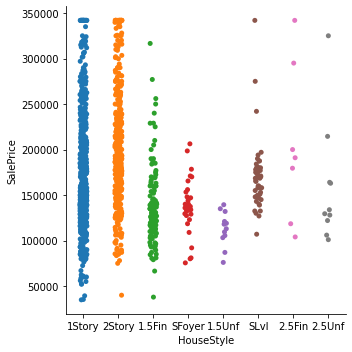

In [74]:
sns.catplot(x="HouseStyle", y="SalePrice", data=price)

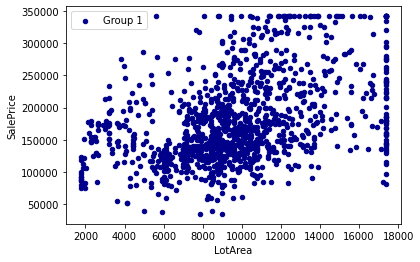

In [78]:
ax = price.plot.scatter(x="LotArea", y="SalePrice", color="DarkBlue", label="Group 1")

There are some houses which has lot area high but sold for low price so we need to analyse on this further

In [70]:
YearBuilt, SaleCondition

dtype('O')

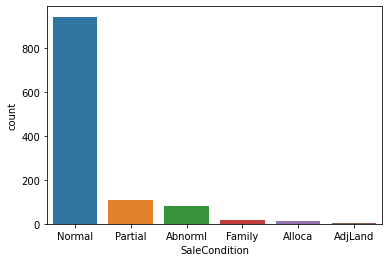

In [79]:
ax = sns.countplot(x="SaleCondition", data=price)

Normal condition houses are sold high 
Partial and abnormal houses are compratively low in sales
Family Alloca and AdjLands are sold in relatively very less counts

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


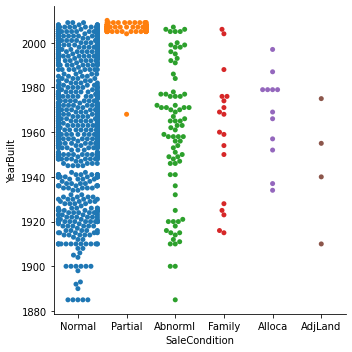

In [81]:
sns.catplot(x="SaleCondition", y="YearBuilt", hue="SaleCondition", kind="swarm", data=price)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; y

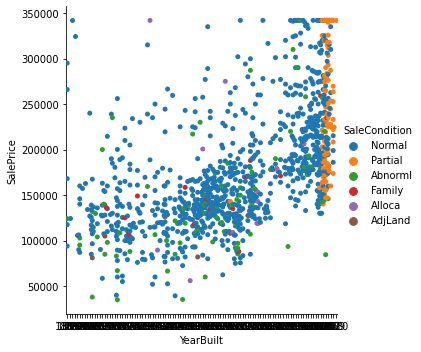

In [82]:
sns.catplot(x="YearBuilt", y="SalePrice", hue="SaleCondition", kind="swarm", data=price)

Text(0, 0.5, 'Number of houses')

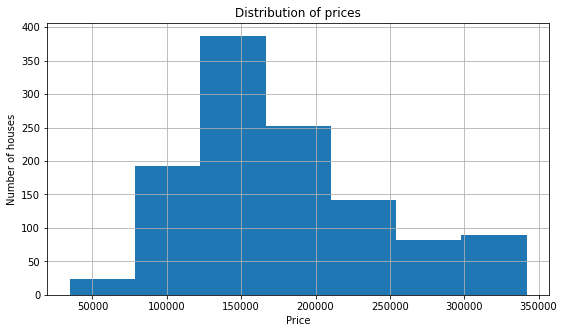

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
price['SalePrice'].hist(bins=7, ax=ax)
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.ylabel('Number of houses')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


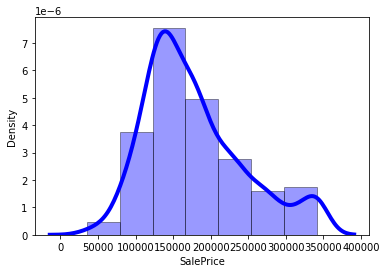

In [89]:
sns.distplot(price['SalePrice'], hist=True, kde=True, 
             bins=int(350000/50000), color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Scalling categorical data

In [ ]:
category_feature